# Preliminaries

In [103]:
library(ggplot2)
library(dplyr)
library(GGally)
#library(plotly)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.4.1"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
setwd('..')
path <- getwd()
setwd(paste(path, "/Results/PCA", sep = ""))
getwd()

In [6]:
#Read data
coeffs = read.csv("coeffs.csv")

## Data cleaning

In [16]:
#Remove no sex participants
coeffs = filter(coeffs, Sex == 'Female' | Sex == 'Male')
coeffs = droplevels(coeffs)

In [28]:
#Removed NAs from database
coeffs = na.omit(coeffs)

# Descriptive stats

In [29]:
summary(coeffs[,2:5])

     Sex            Age            Height          Weight      
 Female:3432   Min.   :15.00   Min.   :130.8   Min.   : 29.94  
 Male  :2135   1st Qu.:20.00   1st Qu.:162.3   1st Qu.: 58.97  
               Median :22.00   Median :168.2   Median : 67.99  
               Mean   :28.17   Mean   :169.2   Mean   : 70.56  
               3rd Qu.:30.00   3rd Qu.:176.0   3rd Qu.: 79.47  
               Max.   :91.00   Max.   :208.3   Max.   :171.09  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


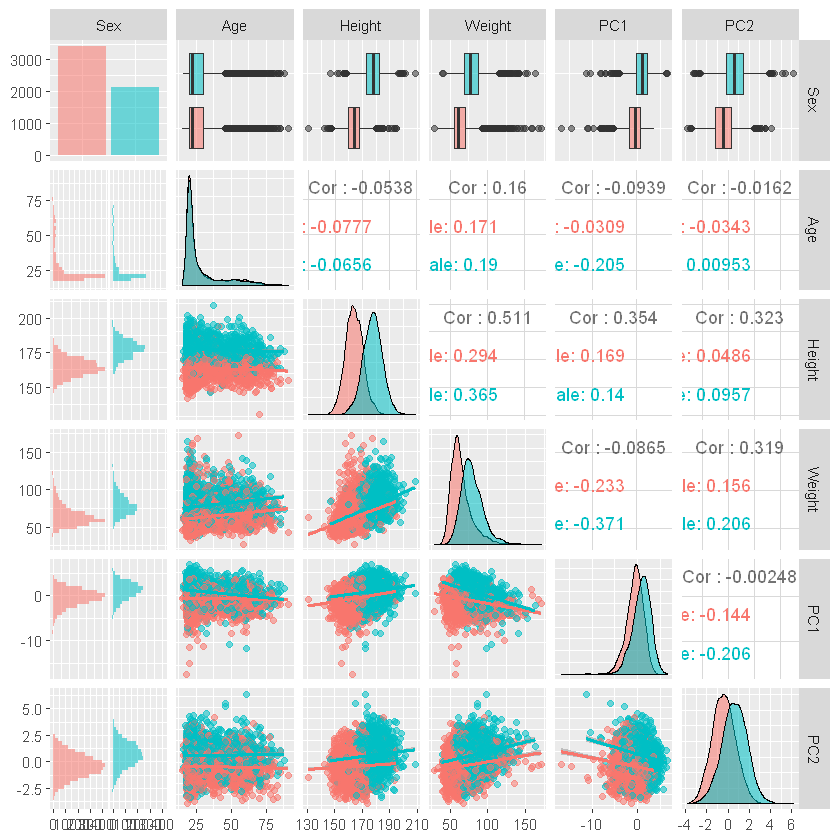

In [61]:
ggpairs(coeffs, columns = 2:7, ggplot2::aes(colour=Sex, alpha = 0.2), 
       lower = list(continuous = "smooth"))

In [69]:
conm <- colMeans(coeffs[coeffs$Sex == 'Male', 6:ncol(coeffs)])
conf <- colMeans(coeffs[coeffs$Sex == 'Female', 6:ncol(coeffs)])

In [97]:
consensus <- as.data.frame(t(data.frame(conm, conf)))
consensus

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
conm,0.9642423,0.6279223,-0.16927554,0.019818224,0.3569083,-0.08224982,-0.1880506,-0.07766733,-0.10568504,0.09150120,...,0.003577043,0.0009855329,5.888722e-05,-0.002228046,0.0014160868,-0.0020883402,0.006652278,0.004668233,-0.0008344092,0.003005956
conf,-0.5605643,-0.3928491,0.08105478,0.002792051,-0.2416701,0.06433696,0.1097033,0.03640854,0.07268088,-0.05863345,...,-0.001749712,-0.0007240477,-3.681789e-04,0.001645342,-0.0003848936,0.0008640886,-0.004025702,-0.002768982,0.0005610164,-0.001512976


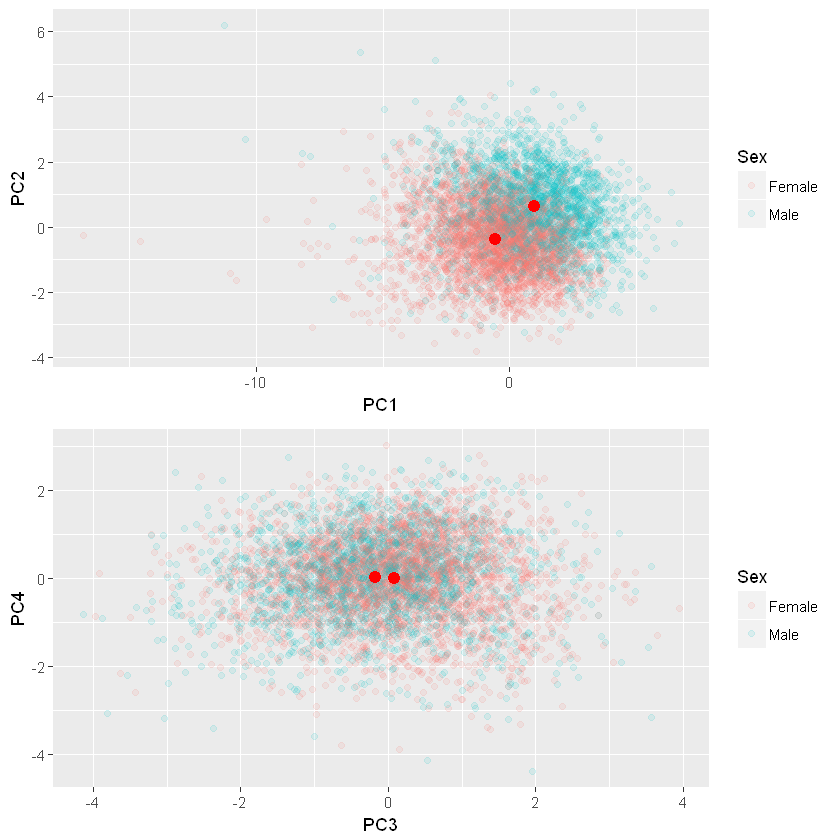

In [110]:
plot1 <- ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) + 
            geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=3)

plot2 <- ggplot(coeffs, aes(PC3, PC4, colour=Sex)) + geom_point(alpha=0.1) + 
            geom_point(data = consensus, aes(PC3, PC4), color="red", size=3)

grid.arrange(plot1, plot2)

# Facial SD (allometric and non-allometric)

In [121]:
totalSD <- consensus[2,] - consensus[1,]
totalSD

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
conf,-1.524807,-1.020771,0.2503303,-0.01702617,-0.5985784,0.1465868,0.2977539,0.1140759,0.1783659,-0.1501347,...,-0.005326755,-0.001709581,-0.0004270661,0.003873388,-0.00180098,0.002952429,-0.01067798,-0.007437215,0.001395426,-0.004518932


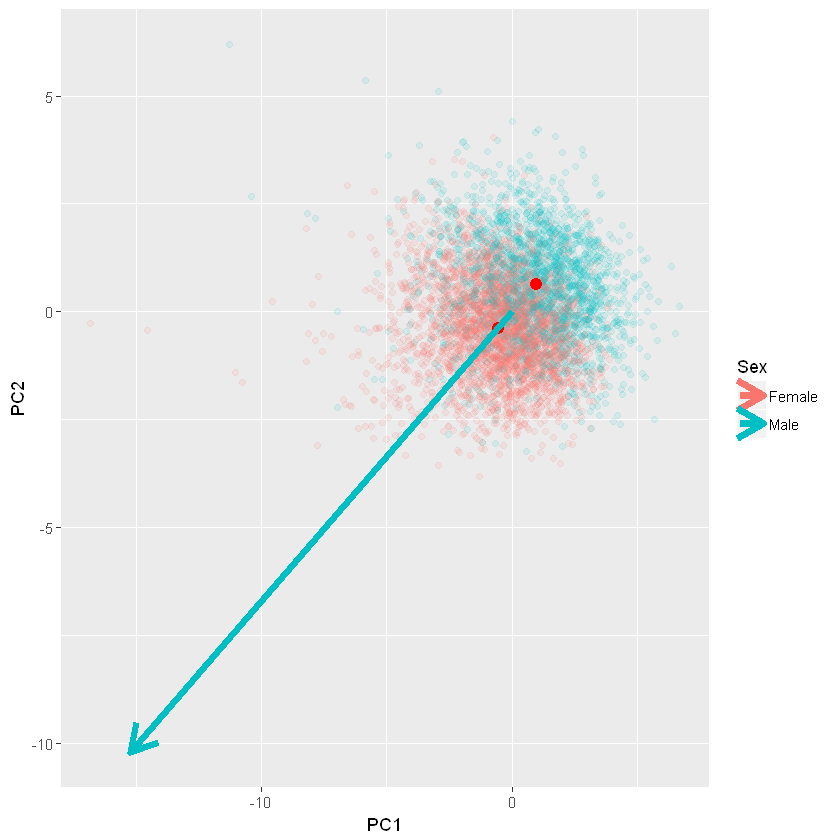

In [171]:
ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) + 
    geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=3) + 
    geom_segment(aes(x = 0, y = 0, xend = totalSD[1,1]*10, yend = totalSD[1,2]*10), arrow=arrow() ,
                size = 2)

In [131]:
#Multivariate linear regression of height and sex on face
fit <- lm(as.matrix(coeffs[,6:ncol(coeffs)]) ~ coeffs$Sex + coeffs$Height)

In [137]:
summary(manova(fit), test="Hotelling-Lawley")
summary(manova(fit), test="Wilks")
summary(manova(fit), test="Roy")
summary(manova(fit), test="Pillai")

                Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
coeffs$Sex       1           3.4716  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1           0.1331    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df   Wilks approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 0.22363  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.88253    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df    Roy approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 3.4716  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.1331    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df  Pillai approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 0.77637  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.11747    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [143]:
coef(fit)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
(Intercept),-7.99785915,-2.30475072,2.86288108,0.400831446,0.372051140,1.342397967,0.0618685842,0.538351356,-0.599265401,-0.0366074157,...,0.0094079848,-0.0061225782,-0.018150374,-2.442793e-04,1.391806e-02,2.254865e-03,0.0407388871,0.0401369762,-1.024113e-03,-0.0286241051
coeffs$SexMale,0.91743410,0.86463441,-0.02315028,0.049532375,0.648698478,-0.042212917,-0.3016603530,-0.073084320,-0.233240944,0.1519334308,...,0.0062379572,0.0012687054,-0.001025131,-4.027706e-03,2.969042e-03,-2.838850e-03,0.0143337156,0.0109411642,-1.524876e-03,0.0023048804
coeffs$Height,0.04532047,0.01165051,-0.01695155,-0.002425523,-0.003739819,-0.007788091,0.0002914892,-0.003058677,0.004094624,-0.0001342196,...,-0.0000679914,0.0000328969,0.000108359,1.151474e-05,-8.715757e-05,-8.474943e-06,-0.0002727809,-0.0002614551,9.659266e-06,0.0001652065


In [176]:
allometricSD <- coef(fit)[3,] * (mean(coeffs[coeffs$Sex == 'Female',4]) - mean(coeffs[coeffs$Sex == 'Male',4]))
non.allometricSD <- as.numeric(totalSD) - allometricSD

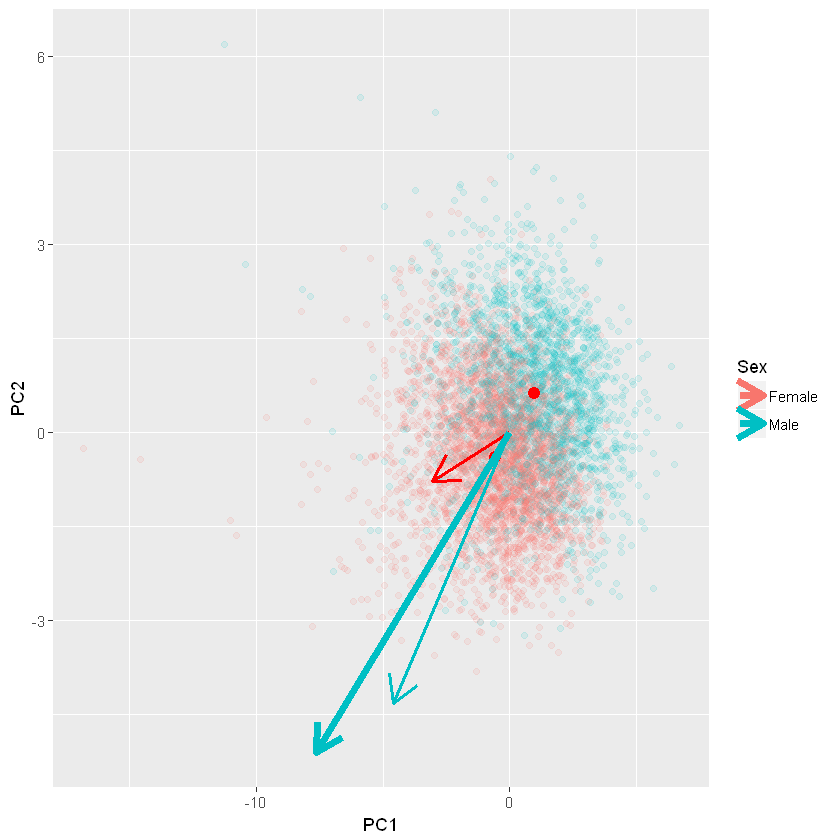

In [179]:
ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) + 
    geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=3) + 
    geom_segment(aes(x = 0, y = 0, xend = allometricSD[1]*5, yend = allometricSD[2]*5), arrow=arrow() ,
                size = 1, color="red") + 
    geom_segment(aes(x = 0, y = 0, xend = totalSD[1,1]*5, yend = totalSD[1,2]*5), arrow=arrow() ,
                size = 2) + 
    geom_segment(aes(x = 0, y = 0, xend = non.allometricSD[1]*5, yend = non.allometricSD[2]*5), arrow=arrow() ,
                size = 1)